<a href="https://colab.research.google.com/github/rameezrajam/Backup-Server-Script/blob/main/Stock_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Price Prediction using LSTM, Facebook Prophet and ARIMA**

In [1]:
import pandas
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
plt.style.use('fivethirtyeight')

In [2]:
## Get the APPLE stock data
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2024, 12, 21)

df = yf.download("TATAMOTORS.NS", start=start, end=end)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
Date,,,,,,
2012-01-02,175.647980,181.997894,183.086212,176.902542,179.029724,10175802
2012-01-03,185.196655,191.891769,192.732742,184.224014,184.273483,15868503
2012-01-04,192.119446,199.064835,200.351028,190.951843,191.792831,22752471
2012-01-05,192.978821,199.955276,203.566544,198.075439,198.817490,21640778
2012-01-06,194.411118,201.439362,202.824509,196.393478,197.877563,13553191
...,...,...,...,...,...,...
2024-12-16,784.799988,784.799988,793.950012,783.000000,791.400024,10015361
2024-12-17,779.750000,779.750000,796.349976,778.000000,785.500000,10270253


In [3]:
print(df.head())
print(df.shape)

Price          Adj Close         Close          High           Low  \
Ticker     TATAMOTORS.NS TATAMOTORS.NS TATAMOTORS.NS TATAMOTORS.NS   
Date                                                                 
2012-01-02    175.647980    181.997894    183.086212    176.902542   
2012-01-03    185.196655    191.891769    192.732742    184.224014   
2012-01-04    192.119446    199.064835    200.351028    190.951843   
2012-01-05    192.978821    199.955276    203.566544    198.075439   
2012-01-06    194.411118    201.439362    202.824509    196.393478   

Price               Open        Volume  
Ticker     TATAMOTORS.NS TATAMOTORS.NS  
Date                                    
2012-01-02    179.029724      10175802  
2012-01-03    184.273483      15868503  
2012-01-04    191.792831      22752471  
2012-01-05    198.817490      21640778  
2012-01-06    197.877563      13553191  
(3198, 6)


In [4]:
df_10 = pd.DataFrame()
df_10['Close'] = df['Close'].rolling(window=10).mean()
df_20 = pd.DataFrame()
df_20['Close'] = df['Close'].rolling(window=20).mean()
df_30 = pd.DataFrame()
df_30['Close'] = df['Close'].rolling(window=30).mean()
df_40 = pd.DataFrame()
df_40['Close'] = df['Close'].rolling(window=40).mean()


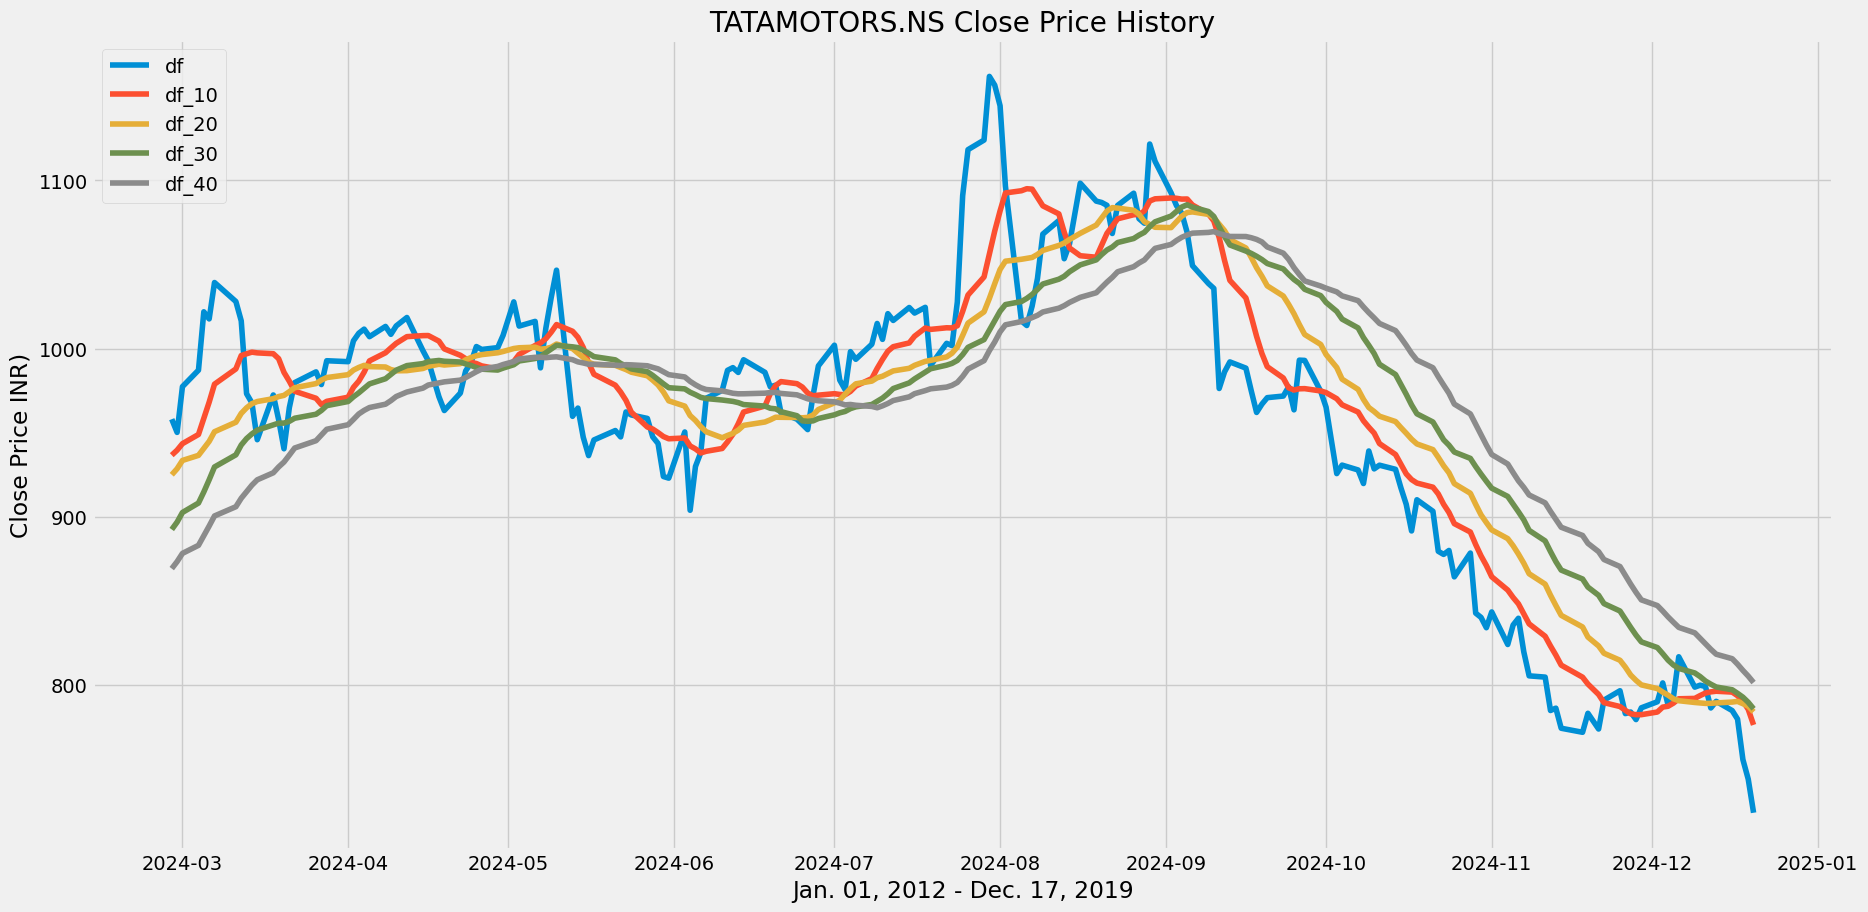

In [6]:
#Visualize the data
plt.figure(figsize=(20,10))
plt.plot(df['Close'].tail(200), label='df')
plt.plot(df_10['Close'].tail(200), label='df_10')
plt.plot(df_20['Close'].tail(200), label='df_20')
plt.plot(df_30['Close'].tail(200), label='df_30')
plt.plot(df_40['Close'].tail(200), label='df_40')
plt.title('TATAMOTORS.NS Close Price History')
plt.xlabel('Jan. 01, 2012 - Dec. 17, 2019')
plt.ylabel('Close Price INR)')
plt.legend(loc='upper left')
plt.show()

In [7]:
# Create a new dataframe with only the 'Close column
data = df[('Close')]
print(data.head())

Ticker      TATAMOTORS.NS
Date                     
2012-01-02     181.997894
2012-01-03     191.891769
2012-01-04     199.064835
2012-01-05     199.955276
2012-01-06     201.439362


In [8]:
#Convert the dataframe to a numpy array
dataset = data.values

In [9]:
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

2559

In [10]:
# Scale the data
# Ensure the dataset is a 2D array, e.g., (n_samples, 1)
dataset = dataset.reshape(-1, 1)

# Initialize the scaler
scaler = MinMaxScaler()  # Feature range is (0, 1) by default

# Fit and transform the dataset
scaled_data = scaler.fit_transform(dataset)

In [11]:
# Create the training data set
train_data = scaled_data[0:training_data_len,:]
## Split the data into train and test
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()
print(len(x_train))
print(len(y_train))

[array([0.10642278, 0.11544551, 0.12198699, 0.12279903, 0.12415244,
       0.12144562, 0.12550586, 0.1253254 , 0.12649835, 0.12884427,
       0.13331051, 0.13660381, 0.13340074, 0.13755121, 0.13813768,
       0.13813768, 0.14070917, 0.14882962, 0.15685985, 0.15149133,
       0.16037872, 0.16457429, 0.16281485, 0.16389759, 0.1675969 ,
       0.16633372, 0.16655928, 0.17260452, 0.17264964, 0.17350679,
       0.18221374, 0.20016898, 0.18938681, 0.18762737, 0.18523636,
       0.18266487, 0.18266487, 0.17995805, 0.17499556, 0.18708601,
       0.18492057, 0.18153704, 0.18194306, 0.18780782, 0.18135656,
       0.18221374, 0.1936726 , 0.19687568, 0.19579296, 0.20210885,
       0.2025149 , 0.19913137, 0.19619898, 0.18532659, 0.18956727,
       0.18415361, 0.18649953, 0.18261976, 0.18658976, 0.18510102])]
[0.185822833369135]

[array([0.10642278, 0.11544551, 0.12198699, 0.12279903, 0.12415244,
       0.12144562, 0.12550586, 0.1253254 , 0.12649835, 0.12884427,
       0.13331051, 0.13660381, 0.1334

In [12]:
#Conver the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2499, 60, 1)

In [14]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
2499/2499 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - loss: 0.0013
Epoch 2/5
2499/2499 ━━━━━━━━━━━━━━━━━━━━ 77s 29ms/step - loss: 2.4894e-04
Epoch 3/5
2499/2499 ━━━━━━━━━━━━━━━━━━━━ 67s 27ms/step - loss: 1.5468e-04
Epoch 4/5
2499/2499 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - loss: 1.4601e-04
Epoch 5/5
2499/2499 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - loss: 1.3768e-04


In [17]:
## Create the testing data set
# Create a new array containing scaled vlues from index 1543 to 2003
test_data = scaled_data[training_data_len-60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [18]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [19]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [20]:
# Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [21]:
print(predictions[0:5], y_test[0:5])

[[417.87585]
 [421.43652]
 [425.80798]
 [416.74823]
 [420.18768]] [[421.45001221]
 [425.75      ]
 [417.        ]
 [420.6499939 ]
 [429.6000061 ]]


In [22]:
# Get the MSE & RMSE
mse = np.mean(predictions-y_test)**2
rmse = np.sqrt(np.mean(predictions-y_test)**2)
mse, rmse

(378.8664826663909, 19.46449286948907)

<ipython-input-23-4b2544b8a612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


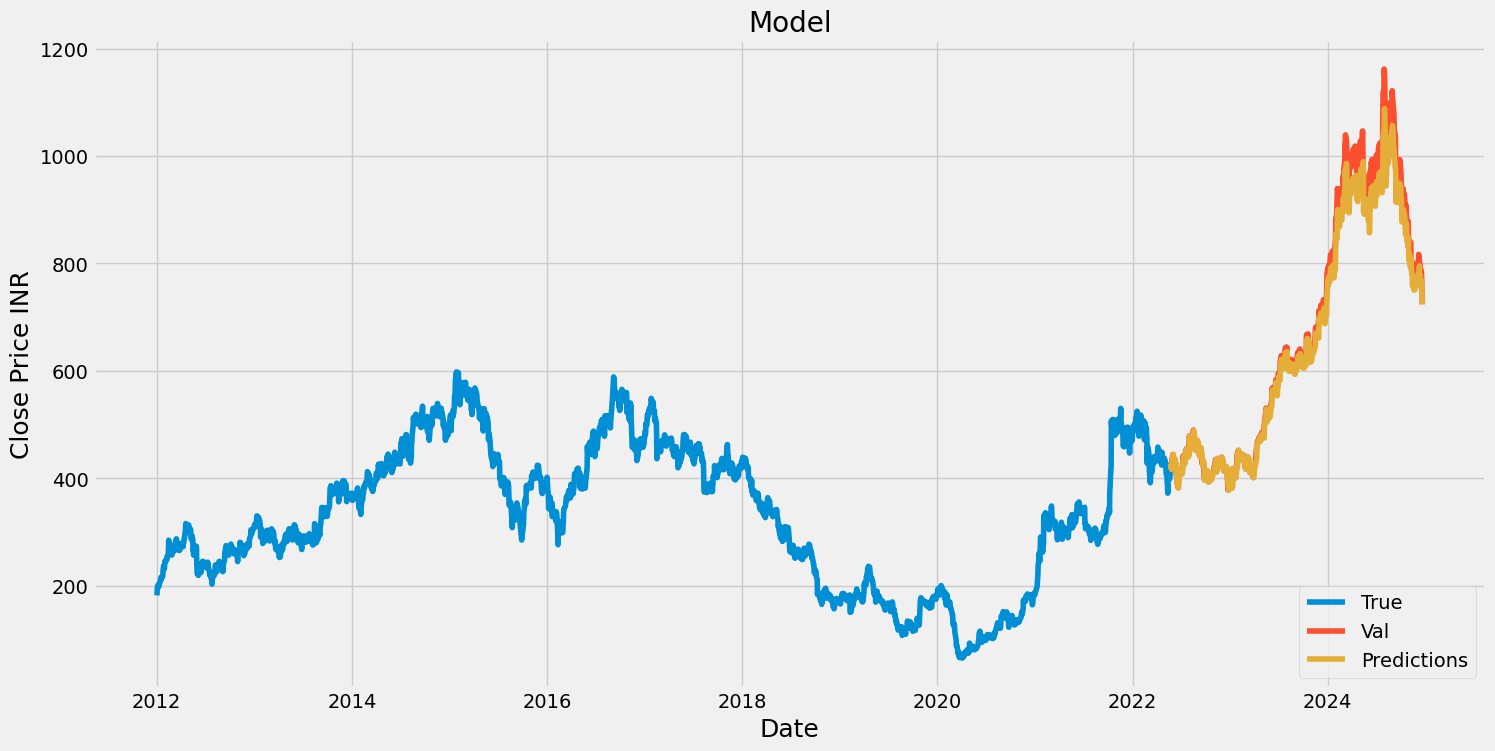

In [23]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['TATAMOTORS.NS'])
plt.plot(valid[['TATAMOTORS.NS','Predictions']])
plt.legend(['True', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df[('Close')]
print(data.head())

Ticker      TATAMOTORS.NS
Date                     
2012-01-02     181.997894
2012-01-03     191.891769
2012-01-04     199.064835
2012-01-05     199.955276
2012-01-06     201.439362


In [ ]:
# Create a new dataframe with only the 'Close column
data = df[('Close')]
print(data.head())

Ticker      TATAMOTORS.NS
Date                     
2012-01-02     181.997894
2012-01-03     191.891769
2012-01-04     199.064835
2012-01-05     199.955276
2012-01-06     201.439362


In [ ]:
# Get the quote
apple_quote = yf.download('AAPL', start='2012-01-01', end='2023-12-17')
#Create a new dataframe
new_df = apple_quote[('Close')]
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 day
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[196.35321]]


In [ ]:
# Get the quote
apple_quote2 = yf.download('AAPL', start='2024-12-4', end='2024-12-5')
apple_quote2

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-12-04,243.009995,243.009995,244.110001,241.25,242.869995,44383900


# **APPLE price prediction using facebook Prophet**

## Load EDA libraries


In [ ]:
##  https://www.youtube.com/watch?v=AX1wKnBPhvU
## https://www.viralml.com/video-content.html?v=AX1wKnBPhvU

## https://www.youtube.com/watch?v=95-HMzxsghY&t=689s
## https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html

In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline
import fbprophet

In [ ]:
dir(fbprophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

In [ ]:
## Load the data
df = web.DataReader('AAPL',data_source='yahoo', start='2012-01-01', end='2020-06-22')

In [ ]:
## Get the number of rows and columns
df = df.reset_index()

In [ ]:
df.shape, df.tail(), df.columns

((2131, 7),
            Date        High         Low  ...       Close      Volume   Adj Close
 2126 2020-06-16  353.200012  344.720001  ...  352.079987  41357200.0  351.446320
 2127 2020-06-17  355.399994  351.089996  ...  351.589996  28532000.0  350.957214
 2128 2020-06-18  353.450012  349.220001  ...  351.730011  24205100.0  351.096985
 2129 2020-06-19  356.559998  345.149994  ...  349.720001  66119000.0  349.090576
 2130 2020-06-22  359.459991  351.149994  ...  358.869995  33861300.0  358.224121
 
 [5 rows x 7 columns],
 Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object'))

In [ ]:
df = df.filter(['Date','Close'])
df.head()

,Date,Close
0,2012-01-03,58.747143
1,2012-01-04,59.062859
2,2012-01-05,59.718571
3,2012-01-06,60.342857
4,2012-01-09,60.247143


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2131 entries, 0 to 2130
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2131 non-null   datetime64[ns]
 1   Close   2131 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 33.4 KB


In [ ]:
#df['Date'] = pd.to_datetime(df['Date'])
#df.head()

In [ ]:
# To filter negative values
df.index[df['Close'] < 0]

Int64Index([], dtype='int64')

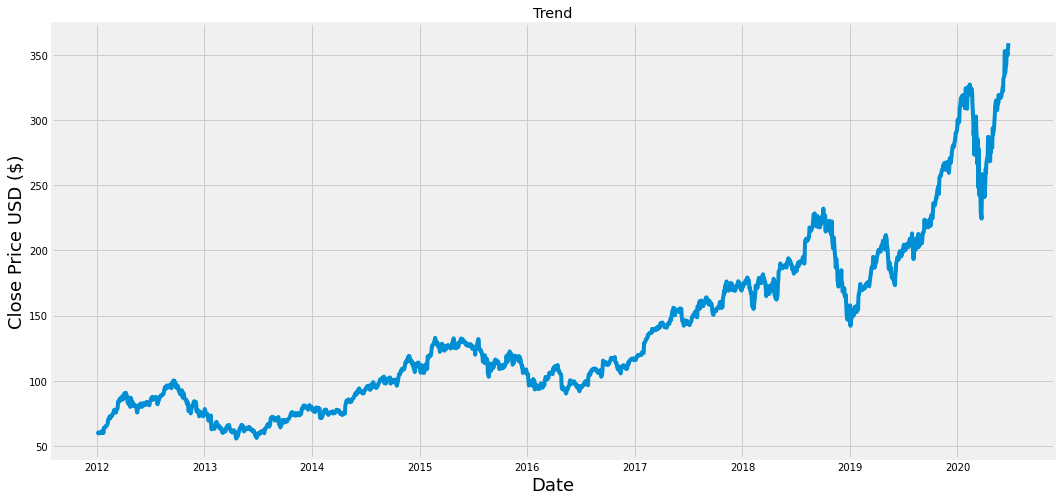

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'], df['Close'])
plt.title('Trend')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# yt = yt-y(t-1)
df['Close_shift'] = df['Close'] - df['Close'].shift(1)
y = df['Close_shift']

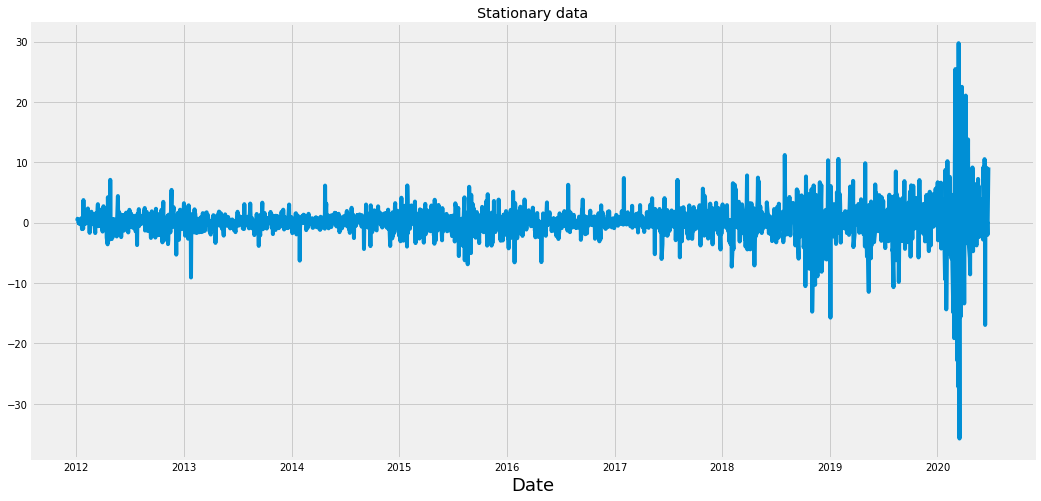

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close_shift'])
plt.title('Stationary data')
plt.xlabel('Date', fontsize=18)
plt.show()

Now, the above graph looks stationary

In [ ]:
from fbprophet import Prophet

## Initialize the model

In [ ]:
model = Prophet()

**Paremeters**


*   growth: linear/logistic
*   seasonality:additive/multiplicative
*   holidays:
*   changepoint







In [ ]:
df.columns

Index(['Date', 'Close', 'Close_shift'], dtype='object')

In [ ]:
## Rename the columns as ds and y
df_pht = df.rename(columns={'Date':'ds', 'Close_shift':'y'})#, inplace=True)

In [ ]:
df_pht.head()

,ds,Close,y
0,2012-01-03,58.747143,NaN
1,2012-01-04,59.062859,0.315716
2,2012-01-05,59.718571,0.655712
3,2012-01-06,60.342857,0.624287
4,2012-01-09,60.247143,-0.095715


In [ ]:
## Split the Data
train_data_len = int(0.8*len(df))
train_data_len

1704

In [ ]:
df_train = df_pht[:train_data_len]
df_test = df_pht[train_data_len:]
df_train.head(), df_train.shape

(          ds      Close         y
 0 2012-01-03  58.747143       NaN
 1 2012-01-04  59.062859  0.315716
 2 2012-01-05  59.718571  0.655712
 3 2012-01-06  60.342857  0.624287
 4 2012-01-09  60.247143 -0.095715, (1704, 3))

## Fit our Model to our Data

In [ ]:
model.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
periods = len(df)-len(df_train)
periods

427

In [ ]:
# Create Future Datas of len(df)-len(df_train) days
future_dates = model.make_future_dataframe(periods=periods)

In [ ]:
# Shape after adding 401 days
future_dates.shape

(2131, 1)

In [ ]:
future_dates.head()

,ds
0,2012-01-03
1,2012-01-04
2,2012-01-05
3,2012-01-06
4,2012-01-09


In [ ]:
# Make Prediction
prediction = model.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-03,0.066182,-1.982881,2.303880,0.066182,0.066182,-0.043156,-0.043156,-0.043156,-0.032421,-0.032421,-0.032421,-0.010735,-0.010735,-0.010735,0.0,0.0,0.0,0.023026
1,2012-01-04,0.066233,-2.215855,2.126373,0.066233,0.066233,-0.021546,-0.021546,-0.021546,-0.016136,-0.016136,-0.016136,-0.005410,-0.005410,-0.005410,0.0,0.0,0.0,0.044687
2,2012-01-05,0.066284,-2.318947,2.037288,0.066284,0.066284,-0.201262,-0.201262,-0.201262,-0.196022,-0.196022,-0.196022,-0.005241,-0.005241,-0.005241,0.0,0.0,0.0,-0.134979
3,2012-01-06,0.066335,-2.376324,1.996794,0.066335,0.066335,-0.247064,-0.247064,-0.247064,-0.236892,-0.236892,-0.236892,-0.010172,-0.010172,-0.010172,0.0,0.0,0.0,-0.180729
4,2012-01-09,0.066488,-1.775452,2.515076,0.066488,0.066488,0.179245,0.179245,0.179245,0.232030,0.232030,0.232030,-0.052785,-0.052785,-0.052785,0.0,0.0,0.0,0.245733


**Narrative**


*   yhat : the predicted forecast
*   yhat_lower : the lower border of the prediction

*   yhat_upper: the upper border of the prediction





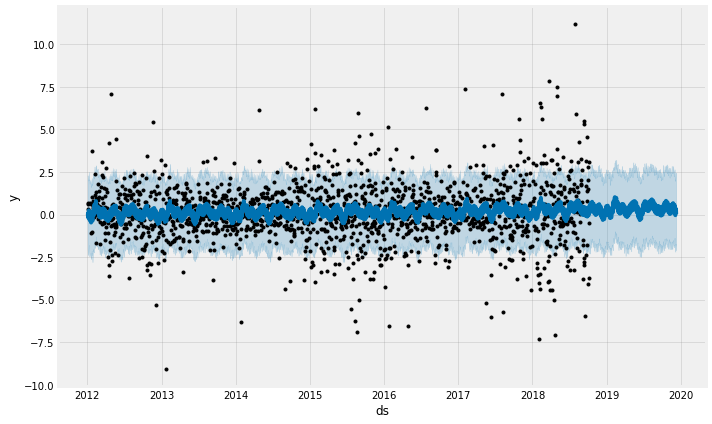

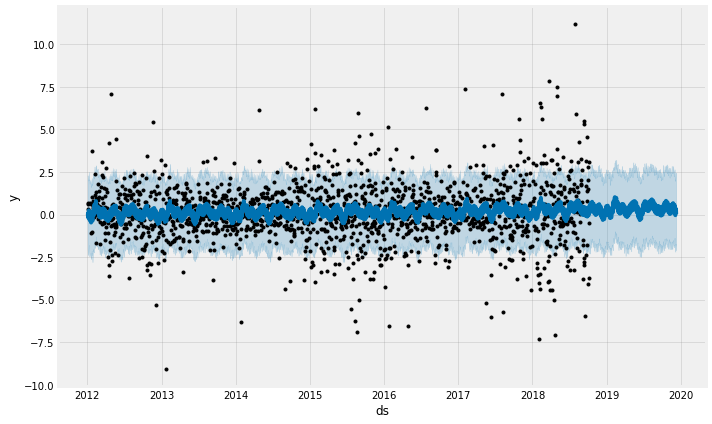

In [ ]:
# Plot Our Predictions
model.plot(prediction)

**Narrative**

*   A Trending data
*   Black dots : the actual data points in our dataset.

*   Deep blue line : the predicted forecast/the predicted values
*   Light blue line : the boundaries





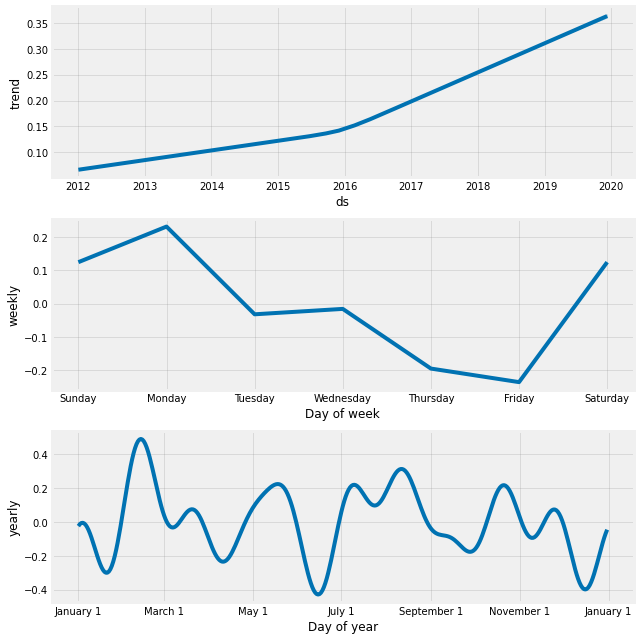

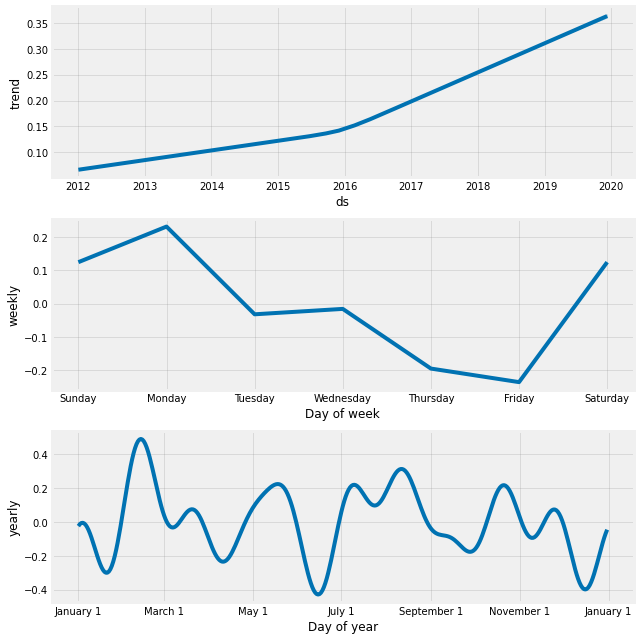

In [ ]:
model.plot_components(prediction)

**Cross Validation**

*   For measuring forecast error by comparing the predicted values with the actual values

*   initial:the size of the initial training period

*   period : the spacing between cutoff dates
*   horizon : the forecast horizon((ds minus cutoff)


*   By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon



In [ ]:
# import cross_validation
from fbprophet.diagnostics import cross_validation

In [ ]:
df_train.shape, len(df)-len(df_train)

((1704, 3), 427)

In [ ]:
cv = cross_validation(model, initial='1704 days', period='1 days', horizon = '427 days')

INFO:fbprophet:Making 340 forecasts with cutoffs between 2016-09-03 00:00:00 and 2017-08-08 00:00:00


In [ ]:
cv.head(), cv.shape

(          ds      yhat  yhat_lower  yhat_upper         y     cutoff
 0 2016-09-06  0.073082   -1.916251    2.100914 -0.030006 2016-09-03
 1 2016-09-07  0.162875   -1.621402    2.116859  0.660004 2016-09-03
 2 2016-09-08  0.033376   -1.704417    1.942936 -2.840004 2016-09-03
 3 2016-09-09 -0.011035   -2.034882    2.021289 -2.389999 2016-09-03
 4 2016-09-12  0.415779   -1.682222    2.442419  2.310005 2016-09-03,
 (100084, 6))

**Performance Metrics**

In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:

df_train_pm = performance_metrics(cv)

INFO:fbprophet:Skipping MAPE because y close to 0


In [ ]:
df_train_pm

,horizon,mse,rmse,mae,mdape,coverage
0,43 days,2.273129,1.507690,1.023846,0.987412,0.860196
1,44 days,2.275904,1.508610,1.024784,0.987412,0.859799
2,45 days,2.276496,1.508806,1.025436,0.987271,0.859595
3,46 days,2.277135,1.509018,1.026033,0.987271,0.859409
4,47 days,2.277633,1.509183,1.026562,0.986895,0.859174
...,...,...,...,...,...,...
380,423 days,6.142705,2.478448,1.822740,1.027217,0.652503
381,424 days,6.157890,2.481510,1.826021,1.027128,0.651422
382,425 days,6.172668,2.484485,1.829139,1.026875,0.650666
383,426 days,6.187751,2.487519,1.832347,1.026875,0.649980


## MSE & RMSE

In [ ]:
MSE = sum(df_train_pm['mse'])/len(df_train_pm)
RMSE = sum(df_train_pm['rmse'])/len(df_train_pm)
MSE, RMSE

(4.071566862335263, 1.9910531594027985)

**Visualizing Performance Metrics**

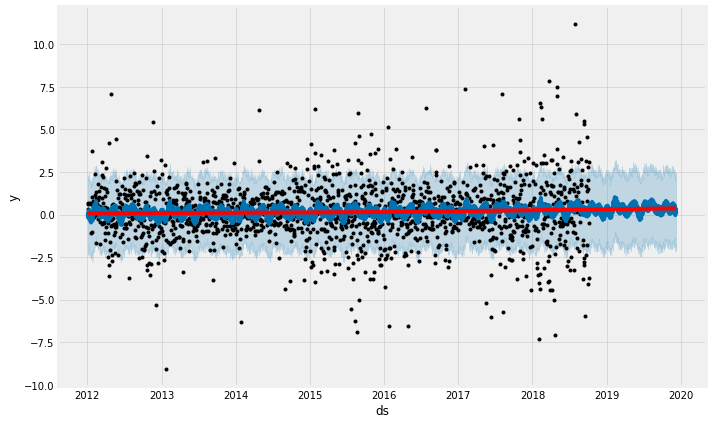

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(), model, prediction)

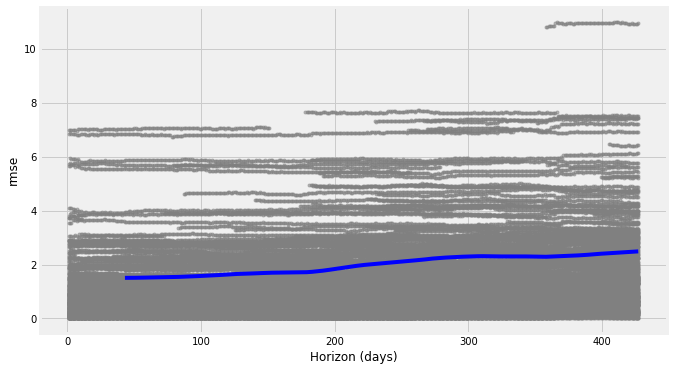

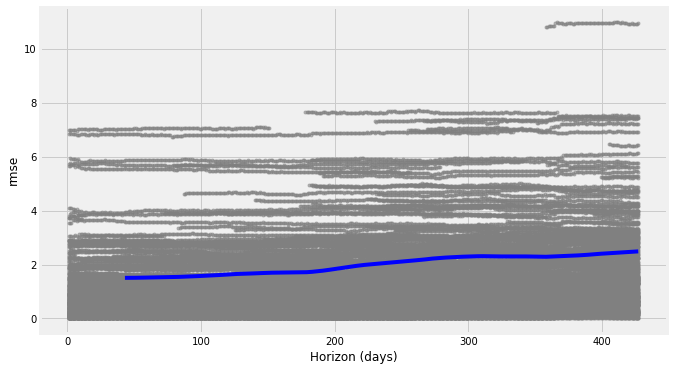

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv,metric='rmse')

# **APPLE price prediction using ARIMA Model**

In this notebook will be performed:
1. Importing Libraries
2. Preprocessing
3. APPLE Stock Market Analyis
4. APPLE ARIMA (AutoRegressive Integrated Moving Average) Time Series Prediction

## Importing Libraries

In [ ]:
## https://www.youtube.com/watch?v=2XGSIlgUBDI
## https://www.youtube.com/watch?v=YzMV--KhI2I

In [ ]:
import numpy as np
import pandas as pd
import os
import pandas_datareader as web
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime
warnings.filterwarnings('ignore')

## Apple Stock Market Analyis

In [ ]:
df = web.DataReader('AAPL',data_source='yahoo', start='2012-01-01', end='2020-06-22')
#df['new_column'] = range(0, len(df))
df= df.reset_index()
#df = df.set_index('new_column')
#df = df.reset_index(drop=True)
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.765709
1,2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.038536
2,2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.605175
3,2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.144630
4,2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.061932


In [ ]:
print(df.shape)
print(df.columns)

(2131, 7)
Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2131 entries, 0 to 2130
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2131 non-null   datetime64[ns]
 1   High       2131 non-null   float64       
 2   Low        2131 non-null   float64       
 3   Open       2131 non-null   float64       
 4   Close      2131 non-null   float64       
 5   Volume     2131 non-null   float64       
 6   Adj Close  2131 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 116.7 KB


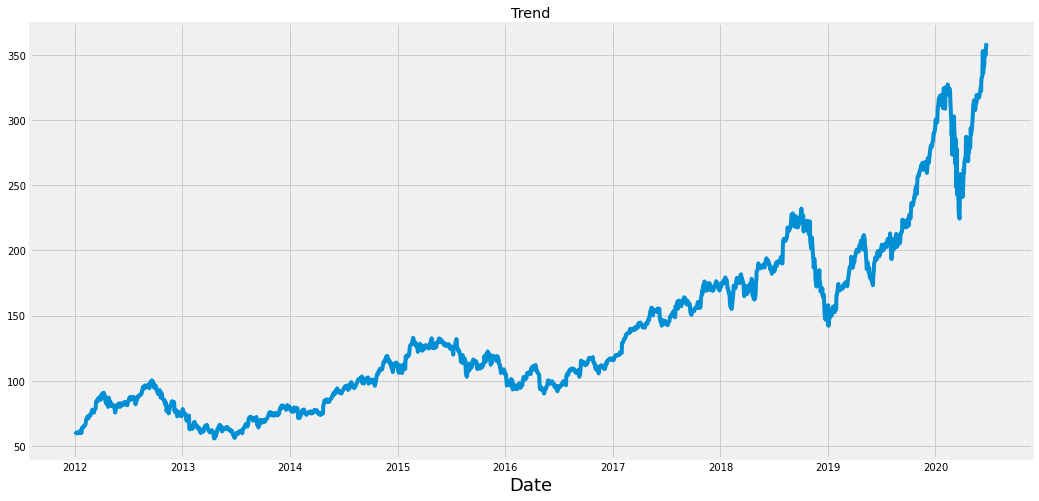

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close'])
plt.title('Trend')
plt.xlabel('Date', fontsize=18)
plt.show()

In [ ]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result = adfuller(df['Close'])

In [ ]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(close):
  result = adfuller(close)
  labels = ['ADF Test Statistics','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary")
  else:
    print("Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary")

In [ ]:
adfuller_test(df['Close'])

ADF Test Statistics : 1.228718589876132
p-value : 0.9961784176775027
#Lags Used : 26
Number of Observations Used : 2104
Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary


In [ ]:
df['Close_shift'] = df['Close'] - df['Close'].shift(1)

In [ ]:
df['Close_shift'] = df['Close_shift'].fillna(method='bfill')
df['Close_shift']

0       0.315716
1       0.315716
2       0.655712
3       0.624287
4      -0.095715
          ...   
2126    9.089996
2127   -0.489990
2128    0.140015
2129   -2.010010
2130    9.149994
Name: Close_shift, Length: 2131, dtype: float64

In [ ]:
test_result = adfuller(df['Close_shift'])

In [ ]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(close):
  result = adfuller(close)
  labels = ['ADF Test Statistics','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary")
  else:
    print("Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary")

In [ ]:
adfuller_test(df['Close_shift'])

ADF Test Statistics : -7.6124920956286335
p-value : 2.2359627605528836e-11
#Lags Used : 25
Number of Observations Used : 2105
Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary


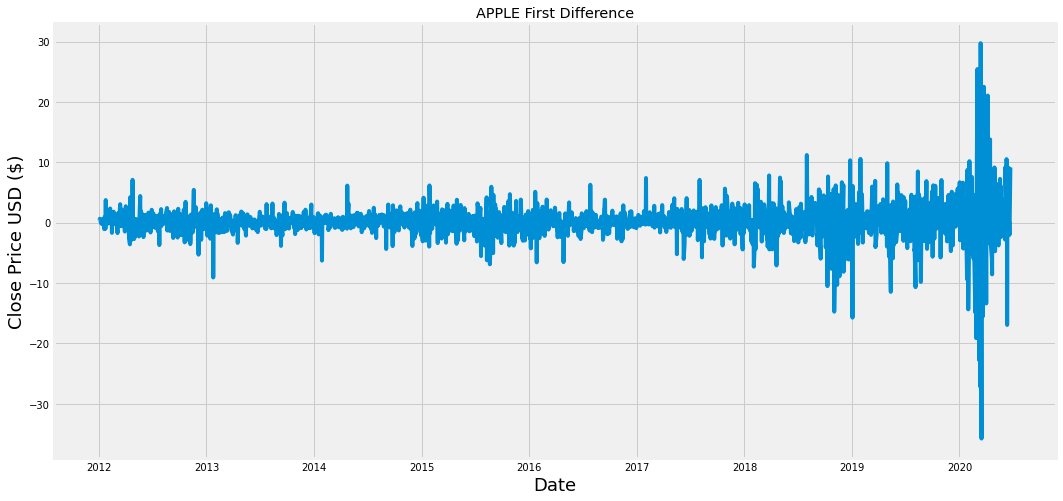

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close_shift'])
plt.title("APPLE First Difference")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

## **Auto Regressive Model**
### **Final Thoughts on Autocorrelation and Partial Autocorrelation**

1.   Identification of an AR model is often best done with the PACF
-- For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.


2.   Identification of an MA model is often best done with the ACF rather than the PACF.
-- For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q. AR model - p, differencing - d, MA lags - q



In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

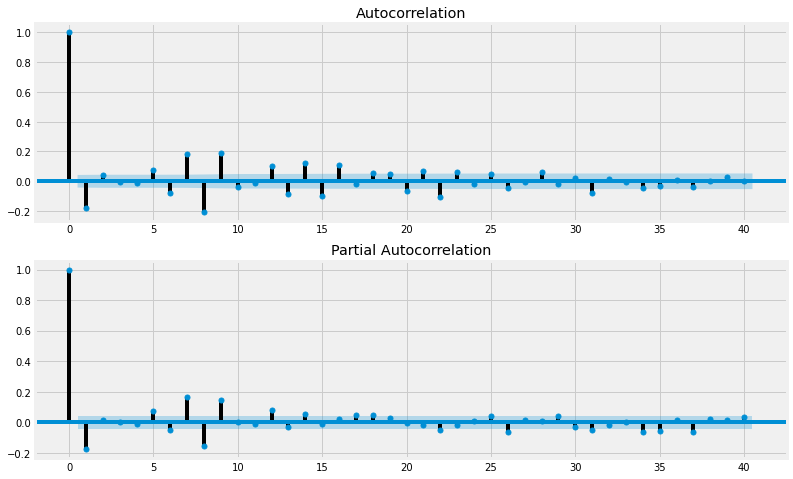

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Close_shift'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Close_shift'].iloc[1:],lags=40,ax=ax2)

## ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

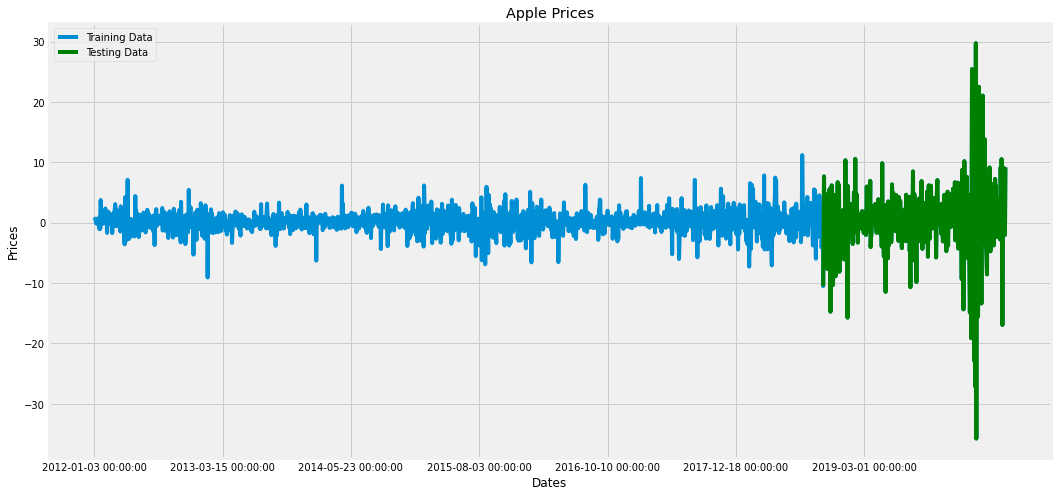

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(16,8))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close_shift'], label='Training Data')
plt.plot(test_data['Close_shift'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:2000:300])
plt.legend()

In [ ]:
#p=1, d=0, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#model=ARIMA(train_data['Close_shift'],order=(1,1,1))
model=ARIMA(df['Close_shift'],order=(1,0,1))
model_fit=model.fit()

In [ ]:
#model_fit.summary()

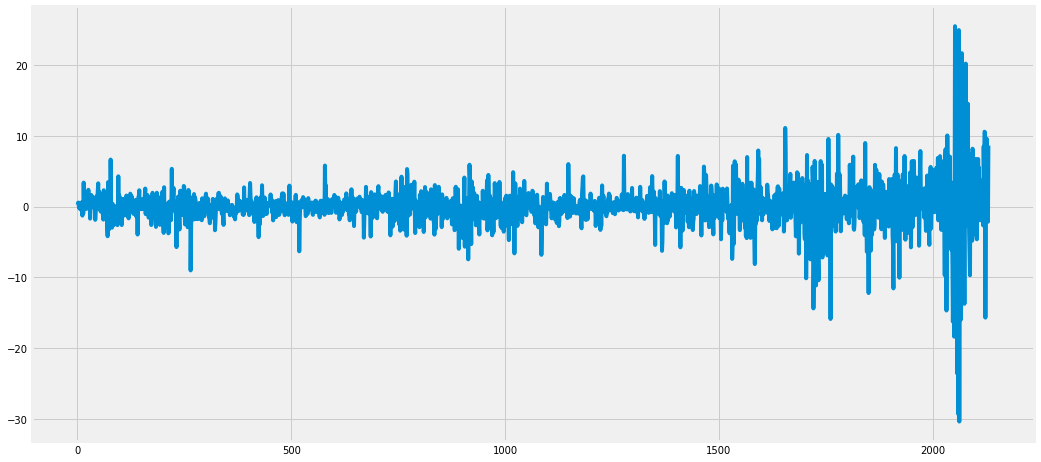

In [ ]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
plt.figure(figsize=(16,8))
#residuals.plot()
plt.plot(residuals)

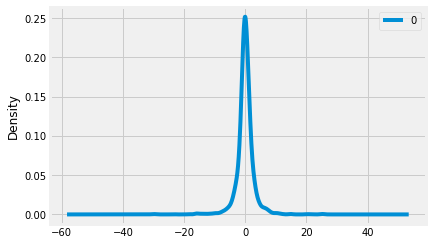

In [ ]:
residuals.plot(kind='kde')

In [ ]:
residuals.describe()

,0
count,2131.000000
mean,0.000013
std,2.966722
min,-30.375379
25%,-0.914729
50%,-0.029428
75%,1.038354
max,25.506720


In [ ]:
train_arima = train_data['Close_shift'].values
test_arima = test_data['Close_shift'].values

In [ ]:
#p_values = range(0,4)
#d_values = range(0,3)
#q_values = range(0,2)

In [ ]:
# Way-1
#import itertools
#pdq = list(itertools.product(p_values,d_values,q_values))
#pdq

In [ ]:
#import warnings
#warnings.filterwarnings('ignore')
#for param in pdq:
#  for i in range(len(test_arima)):
#        try:
#          model = ARIMA(trin_arima,order=param)
#          model_fit = model.fit(disp=0)
#          pred_y = model_fit.forecast()[0]
#          predictions.append(pred_y)
#          error = mean_sqared-error(test, predictions)
#          print(model_fit.aic)
#          print("ARIMA%s, MSE=0.2, RMSE=0.2"% (order,error,math.sqrt(error)))
#        except:
#          continue

In [ ]:
#for p in p_values:
#  for d in d_values:
#    for q in q_values:
#      order = (p,d,q)
#      train, test = train_arima, test_arima
#      predictions = list()
#      for i in range(len(test_arima)):
#        try:
#          model = ARIMA(train_arima,order)
#          model_fit = model.fit(disp=0)
#          pred_y = model_fit.forecast()[0]
#          predictions.append(pred_y)
#          error = mean_sqared-error(test_arima, predictions)
#          print("ARIMA%s, MSE=0.2, RMSE=0.2"% (order,error,math.sqrt(error)))
#        except:
#          continue


In [ ]:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_arima]
print(type(history))
predictions = list()
for t in range(len(test_arima)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.predict(start=len(train_arima)+t-1, end = len(train_arima)+t,dynamic=True)
    #output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_arima[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_arima, predictions)
print('MSE : %.3f' % error)
error2 = math.sqrt(error)
print('RMSE : %.3f' % error2)

<class 'list'>
MSE : 61.651
RMSE : 7.852


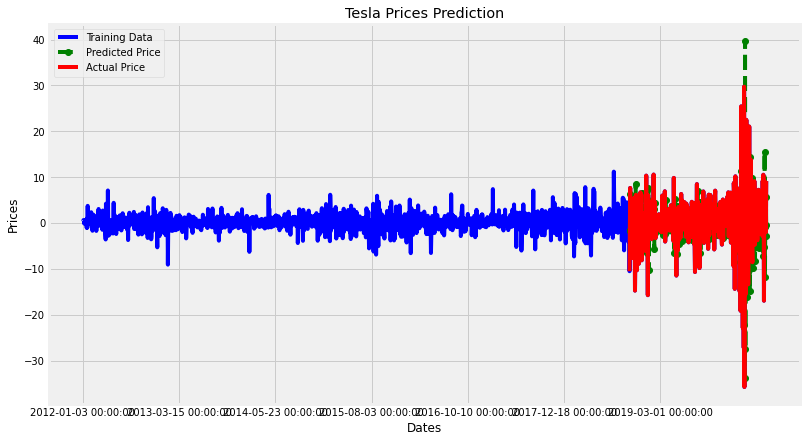

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(df['Close_shift'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close_shift'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

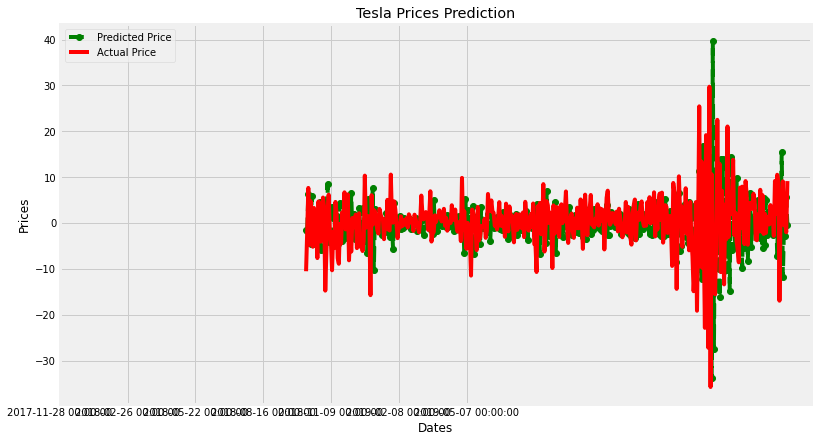

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close_shift'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()